In [78]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import itertools
from __future__ import division
from sklearn.tree import tree, DecisionTreeClassifier, export_graphviz
from sklearn import cluster
import math

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("max_rows", 500)

In [45]:
filePath = 'datasets/NYPD_Motor_Vehicle_Collisions_weather4.csv'
#filePath = "datasets/weather_count.csv"
colls = pd.read_csv(filePath)

print len(colls.index)

colls = colls[pd.notnull(colls['LOCATION'])]


769054


In [ ]:
colls['LATITUDE'] = colls.LOCATION.str.split(',').str.get(0).str.split('(').str.get(1).astype('float64')
colls['LONGITUDE'] = colls.LOCATION.str.split(',').str.get(1).str.split(')').str.get(0).astype('float64')

In [149]:
 condition = 'Fog'

In [150]:
X = colls[colls.Conditions == condition][['LATITUDE','LONGITUDE']].values

In [151]:
eps = 0.0012

core_point_size =  5


##############################################################################
# Compute DBSCAN
db = DBSCAN(eps=eps, min_samples=core_point_size).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 14
Silhouette Coefficient: -0.624


In [47]:
def perform_db_scan(X, eps, core_point_size):

    db = DBSCAN(eps=eps, min_samples=core_point_size).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    return n_clusters_

In [67]:
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

dfs = {}
for i in colls.Conditions.unique():
    if i != i:
        continue
    print i
    conditionDataFrame = colls[colls.Conditions == i].copy()
    conditionDataFrame['Cluster'] = perform_db_scan(conditionDataFrame[['LATITUDE','LONGITUDE']].values ,eps, core_point_size)
    dfs[i] = conditionDataFrame[conditionDataFrame.Cluster >= 0]

Mostly Cloudy
Overcast
Light Rain
Heavy Rain
Scattered Clouds
Light Drizzle
Light Snow
Rain
Light Ice Pellets
Fog
Shallow Fog
Patches of Fog
Partly Cloudy
Haze
Clear
Thunderstorm
Light Thunderstorms and Rain
Heavy Thunderstorms and Rain
Thunderstorms and Rain
Squalls
Mist
Snow
Light Freezing Rain
Light Freezing Drizzle
Unknown
Light Rain Showers
Ice Pellets
Blowing Snow
Heavy Snow
Thunderstorms with Small Hail


In [54]:
dfs['Rain'].Cluster.unique()

array([10], dtype=int64)

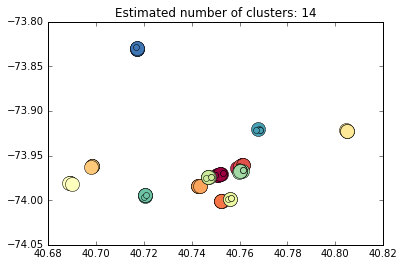

In [152]:

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        continue
        ##col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [153]:
df[df.Cluster >= 0]

LATITUDE  LONGITUDE  Cluster
3     40.789498 -73.782236        0
29    40.789386 -73.782317        0
38    40.760223 -73.967462        6
121   40.789386 -73.782317        0
170   40.696169 -73.804491        1
173   40.751658 -73.990132        9
177   40.764995 -73.976705        2
274   40.828519 -73.841179        3
293   40.772209 -73.982179        4
301   40.667116 -73.834650        5
330   40.667116 -73.834650        5
361   40.761551 -73.966584        6
370   40.695638 -73.803710        1
395   40.828519 -73.841179        3
398   40.828519 -73.841179        3
399   40.828519 -73.841179        3
410   40.761551 -73.966584        6
440   40.761551 -73.966584        6
452   40.665630 -73.739207        7
466   40.760906 -73.966996        6
471   40.764323 -73.977196        2
495   40.773033 -73.982197        4
565   40.789386 -73.782317        0
582   40.750318 -73.991111        9
601   40.666439 -73.834773        5
803   40.696169 -73.804491        1
904   40.751658 -73.990132        9
974   40.755924 -73.974889        8
986   40.666439 -73.834773        5
988   40.828702 -73.842262        3
1056  40.760906 -73.966996        6
1077  40.755924 -73.974889        8
1103  40.666397 -73.738566        7
1167  40.771394 -73.982158        4
1191  40.773033 -73.982197        4
1227  40.763645 -73.977687        2
1283  40.750991 -73.990623        9
1300  40.750318 -73.991111        9
1315  40.666325 -73.834799        5
1328  40.696169 -73.804491        1
1342  40.665925 -73.835028        5
1348  40.789498 -73.782236        0
1396  40.755300 -73.975344        8
1406  40.696169 -73.804491        1
1451  40.764995 -73.976705        2
1512  40.773876 -73.982226        4
1514  40.666397 -73.738566        7
1595  40.755300 -73.975344        8
1638  40.665630 -73.739207        7
1657  40.665257 -73.739551        7
1700  40.760223 -73.967462        6
1755  40.772992 -73.982078        4
1788  40.764995 -73.976705        2
1850  40.764323 -73.977196        2
1934  40.755924 -73.974889        8

In [154]:

df = pd.DataFrame(X, columns=['LATITUDE', 'LONGITUDE'])
df['Cluster'] = db.labels_


inten = df[df.Cluster >= 0].groupby(['Cluster']).agg(['count'])


pd.DataFrame({'cluster':inten.index,'intencity':inten['LATITUDE']['count']})


cluster  intencity
Cluster                    
0              0         10
1              1          8
2              2          8
3              3          6
4              4          6
5              5          6
6              6          5
7              7          6
8              8          5
9              9          7
10            10          9
11            11          6
12            12          5
13            13          6

In [155]:
import geoplotlib as gpl

df = pd.DataFrame(X, columns=['LATITUDE', 'LONGITUDE'])
df['Cluster'] = db.labels_

def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    return [[int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16), 255] for i in colors]

colormap = get_spaced_colors(n_clusters_)

# noise
#lat,lon = coords(-1)
#latlong = {'lon': lon, 'lat': lat}
#gpl.dot(latlong, color='w')

def coords(k):
    lat = df[df['Cluster'] == k].LATITUDE.values
    lon = df[df['Cluster'] == k].LONGITUDE.values
    
    return lat,lon
    
for i in range(0, n_clusters_):
    lat, lon = coords(i)

    latlong = {'lon': lon, 'lat': lat}
    gpl.dot(latlong, color=colormap[i])
    #gpl.dot(latlong, color='w')

#lat,lon = coords(1)
#latlong = {'lon': lon, 'lat': lat}
#gpl.dot(latlong, color='r')

gpl.inline()

In [13]:
df

LATITUDE   LONGITUDE  Cluster
0       -73.8937266  40.8619443       -1
1       -73.9756156  40.6834565       -1
2        -74.014337   40.706237       -1
3       -73.9894015   40.762859       -1
4       -74.0081048  40.7387575       -1
5       -73.8158161  40.6864517       -1
6       -73.8652085  40.8714085       -1
7       -73.8804621  40.8439096       -1
8       -73.9076597  40.8436876       -1
9       -73.9416189  40.7986223       -1
10      -74.0335894  40.6076704       -1
11      -73.8887269  40.7689155       -1
12      -73.9582947  40.8156907       -1
13      -73.8581999  40.6854852       -1
14      -73.9783472  40.6878706       -1
15      -73.9466603  40.8265303       -1
16      -73.7518557  40.6658519       -1
17      -73.8558854  40.8838608       -1
18      -73.7798007  40.6715913       -1
19      -73.9349665  40.8498406       -1
20      -73.9502589  40.6481038       -1
21      -73.9428299  40.6628481       -1
22      -73.9279763  40.8595445       -1
23       -73.822433  40.8189924       -1
24      -73.9813415  40.7470784       -1
25      -73.8825068  40.6664693       -1
26      -73.9517381  40.7254356       -1
27       -73.905433  40.7681673       -1
28      -73.9347028  40.7172094       -1
29      -73.8738137  40.7309373       -1
30      -73.7851066  40.7579024       -1
31      -73.9228869  40.8091071       -1
32      -73.9243649  40.6114632       -1
33      -73.8332862  40.7627471       -1
34      -73.8249346  40.7621308       -1
35      -73.9038195  40.8874788       -1
36       -74.078255  40.6219795       -1
37      -73.9588098  40.7599125       -1
38      -73.8610478  40.8172641       -1
39      -73.8871272  40.9020718       -1
40      -73.9484213  40.7781828       -1
41      -73.8195749  40.5845874       -1
42       -73.894168  40.8995403       -1
43      -74.0889035  40.6302913       -1
44      -73.8022829  40.6649967       -1
45      -73.9171727  40.8724977       -1
46      -73.9578094  40.5782683       -1
47      -73.9818487  40.7662862       -1
48      -73.8525606  40.7230018       -1
49      -74.1634582  40.5437783       -1
50      -73.9852012  40.6745733       -1
51      -73.8608027  40.8463304       -1
52      -73.7636312  40.5946665       -1
53      -73.8877667  40.8373708       -1
54       -73.996839  40.7373607       -1
55      -73.9081028  40.6929769       -1
56      -73.9417575  40.6320154       -1
57      -73.9282769  40.8188104       -1
58      -73.9422623  40.8064149       -1
59      -73.9543177  40.6727536       -1
60      -74.1108094  40.6377463       -1
61      -74.2348753  40.5232384       -1
62      -74.0011515   40.762025       -1
63      -73.9356515  40.8442006       -1
64       -73.931939  40.6823685       -1
65      -73.9542122  40.6479353       -1
66      -73.9909159  40.7221819       -1
67      -73.8395095  40.8826316       -1
68      -73.9237029   40.755879       -1
69      -73.9251435  40.8100528       -1
70      -73.9373965  40.7489156       -1
71      -74.0276253  40.6388037       -1
72      -73.9488804  40.7775544       -1
73      -73.9634255  40.7618573        0
74      -73.8686795  40.6700692       -1
75        -73.74197  40.6614832       -1
76      -73.9888427  40.7585332       -1
77      -73.8725452  40.8787451       -1
78       -74.088126  40.6089813       -1
79      -74.0057791  40.7176779       -1
80      -73.9596347  40.5779945       -1
81      -73.9259009  40.7722611       -1
82      -73.8760673  40.7565375       -1
83      -73.8987786  40.6756249       -1
84      -73.9496815  40.8020241       -1
85      -73.8997975  40.8276848       -1
86      -73.9565424  40.6666035       -1
87      -73.9085154  40.7688806       -1
88       -73.861374  40.6849209       -1
89      -74.0005303  40.7184302       -1
90      -73.9853608  40.7357898       -1
91      -73.8580278  40.8747045       -1
92      -73.9736086  40.7896149       -1
93      -73.7771386  40.6753136       -1
94      -74.0301743  40.6183407       -1
95      -74.0035402  40.7434485       -1
96      -73.9431168  40.6223077   

In [21]:
lat,lon = coords(-1)
lat

array([' -73.8937266', ' -73.9756156', ' -74.014337', ..., ' -73.929592',
       ' -73.9154723', ' -73.9778249'], dtype=object)

In [156]:
df[df.Cluster >= 0].to_csv('datasets/dbscan/'+condition+'.csv', sep=',')

In [59]:
for condition,dataframe in dfs.iteritems():
    dataframe.to_csv('datasets/dbscan/'+condition+'.csv', sep=',')

In [68]:
def coords(df, k):
    lat = df[df['Cluster'] == k].LATITUDE.values
    lon = df[df['Cluster'] == k].LONGITUDE.values

    return lat,lon



def draw_clusters(condition, df):

    clustesCount = df.Cluster.max() + 1

    colormap = get_spaced_colors(clustesCount)
    
    
    for i in range(0, clustesCount):
        lat, lon = coords(df, i)

        latlong = {'lon': lon, 'lat': lat}
        gpl.dot(latlong, color=colormap[i])
    
    print condition
    print "Has %s clusters" % clustesCount
    gpl.inline()

#for condition,dataframe in dfs.iteritems():
#    draw_clusters(condition, dataframe)
dfs['Mostly Cloudy'].Cluster.value_counts()

2150    216491
Name: Cluster, dtype: int64

In [138]:
colls.Conditions.value_counts()

Mostly Cloudy                    216491
Scattered Clouds                 130504
Overcast                          91121
Partly Cloudy                     72119
Light Rain                        38607
Clear                             25901
Light Snow                        11922
Rain                               6664
Light Drizzle                      5660
Fog                                2909
Haze                               2828
Heavy Rain                         2012
Light Thunderstorms and Rain       1319
Snow                               1129
Light Freezing Rain                 768
Thunderstorm                        724
Heavy Thunderstorms and Rain        526
Light Ice Pellets                   336
Mist                                248
Thunderstorms and Rain              215
Unknown                             172
Heavy Snow                          141
Light Freezing Drizzle              121
Shallow Fog                          84
Patches of Fog                       59


### Create the cluster flares json

In [158]:
r = 'datasets/dbscan/'

paths = [r+'Fog.csv', r+'Heavy Rain.csv', r+'Rain.csv', r+'Snow.csv']

clusters = {}
for p in paths:
    print p.split('/')[-1].split('.')[0]
    clusters[p.split('/')[-1].split('.')[0]] = pd.DataFrame.from_csv(p)

Fog
Heavy Rain
Rain
Snow


In [174]:
clusterRoot = {'name':'clusters','children': []}

for condition,dataframe in clusters.iteritems():
    aChild = {'name': condition, 'children': []}
    for aCluster in dataframe.Cluster.unique():
        aClusterChild = {'name': str(aCluster), 'children': []}
        for point in dataframe[dataframe.Cluster == aCluster].values:
            aClusterChild['children'].append({'name': str(point[0])+' '+str(point[1])})
        aChild['children'].append(aClusterChild)
    clusterRoot['children'].append(aChild)
    
    
clusterRoot

{'children': [{'children': [{'children': [{'name': '40.7894981 -73.7822365'},
      {'name': '40.7893858 -73.7823167'},
      {'name': '40.7893858 -73.7823167'},
      {'name': '40.7893858 -73.7823167'},
      {'name': '40.7894981 -73.7822365'}],
     'name': '0'},
    {'children': [{'name': '40.7602226 -73.967462'},
      {'name': '40.7615508 -73.9665842'},
      {'name': '40.7615508 -73.9665842'},
      {'name': '40.7615508 -73.9665842'},
      {'name': '40.7609059 -73.9669961'},
      {'name': '40.7609059 -73.9669961'},
      {'name': '40.7602226 -73.967462'}],
     'name': '6'},
    {'children': [{'name': '40.6961687 -73.8044909'},
      {'name': '40.6956377 -73.8037099'},
      {'name': '40.6961687 -73.8044909'},
      {'name': '40.6961687 -73.8044909'},
      {'name': '40.6961687 -73.8044909'}],
     'name': '1'},
    {'children': [{'name': '40.7516577 -73.9901323'},
      {'name': '40.7503184 -73.9911106'},
      {'name': '40.7516577 -73.9901323'},
      {'name': '40.7509908 -73

In [175]:
import json
with open('datasets/dbscan/clusters.json', 'w') as fp:
    json.dump(clusterRoot, fp)